# 监督学习：什么是好的模型结果？ Cost Function
# 有时间的话再讨论 - imbalanced 样本不均衡问题

今天的内容比较多，多半是理论的讲解，我们需要大家好好听

1. <span style="color:blue">连续变量</span>的模型，如何来衡量模型结果？
2. <span style="color:blue">二分类</span>问题
    * 假设检验，p-value
    * confusion matrix
    * 召回率，准确率
    * F1-score
    * ROC & AUC
3. <span style="color:blue">分类模型</span>，如何衡量模型结果？
4. <span style="color:blue">imbalanced</span>问题

## 1. 如何定义一个模型结果的好坏？

100%完美?
<img src='./perfect.png'>

绝大部分情况下是这种
<img src='linear.png'>

和这种
<img src='scatterplot_skin_cancer.png'>



或者这种
<img src='Logistic Regression.png'>

#### 这叫什么？
> **幸福的家庭都一样，不幸的家庭各有各的不幸**



面对着各种不幸的模型结果，除了表示默哀以外，还要狠下心来，仔细比较一番
#### 这叫什么？
> **比惨**

<img src='wangcai.jpg'>

<img src='xiaoqiang.jpg'>

<img src='bican.gif'>

## 2. 连续变量的模型，如何来衡量模型结果？
* 距离
* 残差
* sum of squares Error: SSE 残差平方和
* sum of squares for regression: SSR 回归平方和
* total sum of squares: SST 总偏差平方和


<img src='SSESSRSST.png'>

\begin{equation*}
\sum (y_i - \hat{y}_i) = SSE \\
\sum (\hat{y}_i - \bar{y})^2 = SSR \\
\sum (y_i - \bar{y})^2 = SST
\end{equation*}

* 证明
\begin{equation*}
SST = SSE + SSR
\end{equation*}

* 误差 vs 残差

* $R^2$是什么？   回归直线的效用

    * 样本的总偏差平方和中，被回归平方和解释的百分比
\begin{equation*}
R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}
\end{equation*}

In [ ]:
ssR占得比列特别大  就说样本中间的varies 解释的很好   

## 3. 二分类问题
1. 假设检验
* 原假设，事件，事件的概率分布
* p-value： <span style="color:blue">** 在原假设成立时，出现观测值以及更极端情况的概率**</span>
* 备择假设
* Threshold分类阈值
* 设立分类阈值的结果：第一类错误(假阳性)：**弃真**，第二类错误：**存伪**
* 定义阈值的分类效果：显著性水平 $\alpha$   
* $\alpha,第一类错误 \ \beta  第二类错误, 1-\beta \  （true-positive） ,\ or \ power$
* ROC曲线以及其性质: 0.横纵坐标，1. 一般来说面积>0.5, 2. 斜率为正 （$\alpha$ 和 power同增同减）
* 什么样的ROC曲线更好？   离45度线近的不好   离45度线远的好
* ROC曲线历史
* confusion matrix：弃真存伪
* 召回率，准确率
* F1-score



[看pdf](./Binary_Metrix.pdf)

练习 ** measure **

#### 显著性水平（单个预值分类的不确定性） 0.05    Roc整体衡量的有效性 

 P-value和显著性水平不是一个东西   p-value是给一个观测值，对应一个极端情况的概率，显著性水平是规定第一类错误的概率，当p-value的概率小于显著性水平，我们拒绝原假设，反之不拒绝原假设（不是接受）

基本所有机器学习上像医学等容忍假阳性（假设实际没病，测量出有病），不能容忍假阴性（测量没病，实际有病，丢命）
垃圾邮箱识别除外 假阳性（实际不是垃圾邮箱，检测认为垃圾邮箱）

## 4. 多分类模型，如何衡量模型结果？
* 直观上不容易像连续变量一样定义每个预测值离观测值的距离(欧几里得距离）
* 多分类时，多用cross-entropy 来衡量分类的结果

<img src='./classification.png'>


* 借鉴信息熵 $\sum_i^K p(y_i)\log p(y_i)$
    * 将信息（在这里的信息是一个概率分布）编码，所需的最小平均bits长度


<img src='coins.jpg' width=300>

* **问题来了** 
    * 扔硬币，如果硬币正反面概率相同，信息熵是多少？
    * 如果只有正面，信息熵是多少？
    

<img src= 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566901856627&di=814950404cb7aef698a8d71cf6ac98f2&imgtype=0&src=http%3A%2F%2Fgss0.baidu.com%2F94o3dSag_xI4khGko9WTAnF6hhy%2Fzhidao%2Fpic%2Fitem%2F9825bc315c6034a8a60211c9c313495408237692.jpg' width=300>

-1/2ln(1/2)-1/2ln(1/2)             全正面信息熵为0

 $ entropy = -\sum_i^K p(y_i)\log p(y_i)$
 
 $ H(Y) = -p(y=0)\log p(y=0) - p(y=1)\log p(y=1)$

* 信息熵的特点：
    * 衡量混乱程度，信息熵越大，越混乱，越平均
    * 什么叫混乱？
        * $p(positive)=0,p(negative)=1$
        * $p(positive)=0.5,p(negative)=0.5$

* 在分类问题中(classification)
    * 观测到的每个样本可以属于多种（K个）类别，$y_i$ ， i = 1,2,3,...K
    * 用模型预测出来的每种类别，出现的概率，$q(\hat{y}_i=k)$
* cross-entropy 
    * $cross\_entropy = -1/n(\sum_i^n I(y_i==1)\log q(\hat{y}_i=1) + ... + I(y_i==K)\log q(\hat{y}_i=K)$)
    * n为样本量， I是指示函数，当 $y_i=k$为真时，$I(y_i==k)$值为1，假为0
    

* 二分类时
    * cross_entropy为 $-1/n(\sum_i^n I(y_i=0)\log q(\hat{y}_i=0) + I(y_i=1)\log q(\hat{y}_i=1)$)
    
    * 再简化一点， **$-1/n(\sum_i^n y_i\log \hat{q}_i + (1-y_i)\log (1-\hat{q}_i))$**

* 一个案例来算一算二分类的cross-entropy

In [2]:
import numpy as np
A = np.array([0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1  ])
q = np.array([0.1,0.2,0.8,0.9,0.7,0.1,0.1,0.2,0.3,0.9,0.6,0.5])
n = len(A)

In [3]:
cross_entropy = -1/n*(np.sum(A*np.log(q))+np.sum((1-A)*np.log((1-q))))
print('cross_entropy = ',cross_entropy)

cross_entropy =  0.2932517527119438


In [8]:
cross_entropy = -1/n*(np.dot(A,np.log(q))+np.dot((1-A),np.log((1-q))))
print('cross_entropy = ',cross_entropy)

cross_entropy =  0.293251752712


* 本周我们讲 logistic regression时，要从 maximum-likelyhood推出 cross_entropy


## 5. imbalanced问题

* imbalance data就是指正负样本数量相差太大，一类占10%甚至1%以下，另外一类占绝大多数，这对机器学习算法是个现实的挑战。

* 用什么样的衡量方式？不能光看accuracy

* 1000个样本，大多数（980）都属于负样本，正样本只有20个，算法容易被负样本带偏。

* 传统方法（决策树，逻辑回归）倾向于预测样本量大的类别，小样本就被认为是<span style='color:blue'>**噪音**</span>，被忽略了



* 但有很多问题的正样本数量就是很少
    * 金融领域，个人信贷违约
<img src='LendingClub.png' width=600>

    * 订阅服务的客户流失(custom churn rate)：对于中国电信，NetFlix, Hulu这样的公司，准确预测客户流失特别重要
<img src='netflix.png' width=600>

    * 罕见疾病
    


### 如何应对imbalanced datasets?
0. 使用合适的衡量方式
    * F1 
1. 重新采样(resampling)
    * random under-sampling
        * 原有分布：负样本980，正样本20
        * under-sampling后：负样本98,正样本20
        * 优点：
            * 提升运算效率，减少运算时间
        * 缺点：
            * 有可能丢失重要的信息
            * 对总体的估计可能是有偏差的
    * random over-sampling
        * 原有分布：负样本980，正样本20
        * over-sampling后：负样本980，正样本500
        * 优点：
            * 保留了所有有用信息
        * 缺点：
            * 有可能overfiting，过拟合
    * 基于cluster 的重新采样（先用聚类方法找出子类）
        * 原有分布：负样本3类：每类数量 200，400，380，正样本两类：每类数量 13，7
        * 重新采样后：负样本3类：数量   300，300，300，正样本两类：每类数量 150，150
        * 优点：
            * 既解决不同类的样本不均等，又解决同类中子类间的样本不均等
        * 缺点：
            * 有可能过拟合
    * 合成数据 <span style="color:blue">SMOTE</span>
        * 原有分布：负样本980，正样本20
        * 合成数据后后：负样本980，正样本500 （非重复采样，而是生成正样本数据））
<img src='./smote.png' width=500>
        * 优点：
            * 保留负样本所有信息
            * 减缓过拟合
        * 缺点：
            * SMOTE生成的数据可能引入更多的噪音
            * 对高维的数据效果不好
           
2. 集成算法
    

### 安装imbalanced-learn
> pip install -U imbalanced-learn


[参考资料](http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/index.html)

### 例1. 明确按比例resampling, 调整sample数量
> make_imbalance(X,y,ratio)

In [5]:
from collections import Counter # 计数器
import matplotlib.pyplot as plt # 绘图工具包
from sklearn.datasets import load_iris # 经典数据
from imblearn.datasets import make_imbalance # 造不均衡数据
from imblearn.under_sampling import RandomUnderSampler # resampling
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline
print(__doc__)


def plot_pie(y): # 绘图
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct='%1.1f%%')
    ax.axis('equal')

Automatically created module for IPython interactive environment


In [39]:
#Counter(iris.target)

Information of the original iris data set: 
 Counter({0: 50, 1: 50, 2: 50})
Information of the iris data set after making it imbalanced using a dict: 
 ratio={0: 10, 1: 20, 2: 30} 
 y: Counter({2: 30, 1: 20, 0: 10})


D:\program\anaconda\lib\site-packages\imblearn\datasets\_imbalance.py:105: UserWarning: 'ratio' has been deprecated in 0.4 and will be removed in 0.6. Use 'sampling_strategy' instead.
  warnings.warn("'ratio' has been deprecated in 0.4 and will be "


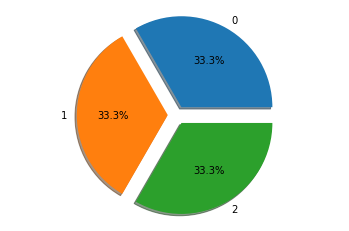

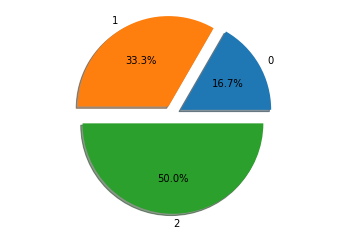

In [6]:
iris = load_iris() # 载入数据

print('Information of the original iris data set: \n {}'.format(
    Counter(iris.target))) #检查原始数据分布
plot_pie(iris.target)

ratio = {0: 10, 1: 20, 2: 30} # 人为改变数据分布
X, y = make_imbalance(iris.data, iris.target, ratio=ratio)

print('Information of the iris data set after making it'
      ' imbalanced using a dict: \n ratio={} \n y: {}'.format(ratio,
                                                              Counter(y)))
plot_pie(y)

In [45]:
X.shape

(60, 4)

### 例2. 利用预设函数，自动调整sample数量
> RandomUnderSampler(ratio=ratio, random_state = 0).fit_sample(X,y)

> ratio = 'minority'

> ratio = 'majority'

> ratio = 'not minority'

> ratio = 'all'

> ratio = 'auto'

Information of the iris data set after balancing using "auto" mode:
 ratio=majority 
 y: Counter({1: 20, 0: 10, 2: 10})


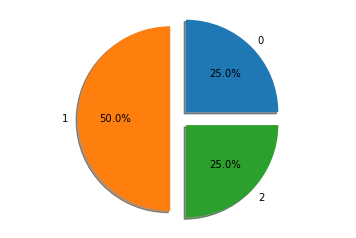

In [57]:
ratio = 'majority' 
X_res, y_res = RandomUnderSampler(ratio=ratio, random_state=0).fit_sample(X, y)

print('Information of the iris data set after balancing using "auto"'
      ' mode:\n ratio={} \n y: {}'.format(ratio, Counter(y_res)))
plot_pie(y_res)

### 例3. 利用合成数据（插值）方法，调整sample数量 (SMOTE)

> from imblearn.over_sampling import SMOTE

> from imblearn.combine import SMOTETomek


Automatically created module for IPython interactive environment


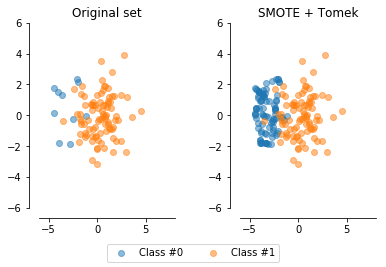

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

print(__doc__)

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=100, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + Tomek')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

#### what is Tomek?

<img src="Tomek_link.png",width=400>

### 例4. 效果怎样？


In [1]:
from collections import Counter

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     categories=categories)

X_train = newsgroups_train.data
X_test = newsgroups_test.data

y_train = newsgroups_train.target
y_test = newsgroups_test.target

print('Training class distributions summary: {}'.format(Counter(y_train)))
print('Test class distributions summary: {}'.format(Counter(y_test)))

Training class distributions summary: Counter({2: 593, 1: 584, 0: 480, 3: 377})
Test class distributions summary: Counter({2: 394, 1: 389, 0: 319, 3: 251})


In [3]:
import pickle

# 把数据存在pickle中
with open('newsgroups_train.pickle','wb') as handle:
    pickle.dump(newsgroups_train,handle)

with open('newsgroups_test.pickle','wb') as handle:
    pickle.dump(newsgroups_test,handle)
    
# 读数据
with open('newsgroups_train.pickle','rb') as handle:
    newsgroups_train = pickle.load(handle)

with open('newsgroups_test.pickle','rb') as handle:
    newsgroups_test = pickle.load(handle)
    

* 不用balanced sample的结果

In [4]:
pipe = make_pipeline(TfidfVectorizer(), 
                     MultinomialNB())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.94      0.86      0.79      0.81      0.64       319
          1       0.96      0.92      0.99      0.94      0.97      0.93       389
          2       0.87      0.98      0.94      0.92      0.93      0.85       394
          3       0.97      0.36      1.00      0.52      0.92      0.85       251

avg / total       0.87      0.84      0.94      0.82      0.91      0.82      1353



* 用了balanced sample的结果

In [5]:
pipe = make_pipeline_imb(TfidfVectorizer(),
                         RandomUnderSampler(),
                         MultinomialNB())

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [6]:
print(classification_report_imbalanced(y_test, y_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.69      0.89      0.88      0.78      0.82      0.65       319
          1       0.97      0.85      0.99      0.90      0.95      0.91       389
          2       0.95      0.88      0.98      0.91      0.95      0.90       394
          3       0.77      0.73      0.95      0.75      0.85      0.71       251

avg / total       0.86      0.84      0.95      0.85      0.90      0.81      1353

